<h2 style='text-align: center;'> Data Science Technology and Systems </h2>
<h3 style='text-align: center;'> Assignment 1: Predictive Modelling of Eating-Out Problem </h3>
<h3 style='text-align: center;'> Part B - Predictive Modelling </h3>
<h4 style='text-align: center;'> Pauline Armamento - u3246782 </h4>

## Introduction

This project aims to leverage a real-world dataset comprising over 10,000 Sydney restaurants from 2018 to predict restaurant ratings. The objective of this project is to conduct a comprehensive Exploratory Data Analysis (EDA), feature engineering, develop regression and classification models, and demonstrate practical deployment skills. 

### The following libraries were used to retrieve, explore, process and present data within the dataset.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import ast
import geopandas as gpd
from shapely.geometry import Point
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC  

import matplotlib.pyplot as plt

%matplotlib inline

os.getcwd()

'C:\\Users\\pauar\\Desktop\\UC\\DSTS\\DSTS Assignment'

## Exploring Data

### Data Description

The dataframe is comprised of 10,500 data entries with 17 columns ['address', 'cost', 'cuisine', 'lat', 'link', 'lng', 'phone', 'rating_number', 'rating_text', 'subzone', 'title', 'type', 'votes', 'groupon', 'color', 'cost_2', 'cuisine_color']

### Read Zomato Restaurant Dataset

In [2]:
# Define the directory path

df = pd.read_csv("data/zomato_df_final_data.csv")

print("DataFrame: zomato_df_final_data")
print("Number of rows:", df.shape[0])
print("Column names:", df.columns.tolist())


DataFrame: zomato_df_final_data
Number of rows: 10500
Column names: ['address', 'cost', 'cuisine', 'lat', 'link', 'lng', 'phone', 'rating_number', 'rating_text', 'subzone', 'title', 'type', 'votes', 'groupon', 'color', 'cost_2', 'cuisine_color']


To understand the contents of our dataframe, we want to look at what data types are present in each columnn. This information will be essential in guiding us for subsequent processing and task analysis within this assignment.

Here we observed a combination of numerical and categorical features that will be further processed for quantitative analysis and modeling. 

In [4]:
# Check data types
df.dtypes

address           object
cost             float64
cuisine           object
lat              float64
link              object
lng              float64
phone             object
rating_number    float64
rating_text       object
subzone           object
title             object
type              object
votes            float64
groupon             bool
color             object
cost_2           float64
cuisine_color     object
dtype: object

#### Verify Column Contents

In addition to examining the data types, we wanted to see the degree of categories for specified columns ['subzone', 'cuisine', 'title', 'type']. This gives us an idea about the distributions of these categories that can provide insights to the restaurant landscape in Sydney.

In [5]:
# Define columns to check contents
columns_to_check = ['subzone', 'cuisine', 'title', 'type']

# Print Column Contents
for column in columns_to_check:
    print(f"Contents of column '{column}':")
    print(df[column].value_counts())
    print()



Contents of column 'subzone':
CBD                                         476
Surry Hills                                 260
Parramatta                                  225
Darlinghurst                                188
Chinatown                                   174
                                           ... 
The Sydney Boulevard Hotel, Darlinghurst      1
Pullman Quay Grand Sydney Harbour, CBD        1
Chullora                                      1
Marriott Sydney Harbour, Circular Quay        1
Holiday Inn Old Sydney, The Rocks             1
Name: subzone, Length: 572, dtype: int64

Contents of column 'cuisine':
['Cafe']                                   1745
['Thai']                                    542
['Chinese']                                 450
['Modern Australian']                       346
['Indian']                                  286
                                           ... 
['Cafe', 'Spanish', 'Italian', 'Tapas']       1
['Desserts', 'Steak', 'Tapas']    

## I. Feature Engineering

Feature engineering as discussed in the DSTS lectures is the process of transforming variables or features from the raw data and making them suitable for the data modelling process. In this part of the assignment we implement feature engineering approaches for the following tasks:

### 1. Perform data cleaning to remove/impute any useless records in the predictive task (such as NA, NaN, etc.)

As we have seen in Assignment Part A, there were missing values in the dataframe where we set aside to resolve in this Part B. We initially show the items containing missing values in the dataframe. Given some data entries where we cannot impute missing values, we removed these data within columns (lat, lng, type, votes, cost_2) and impute missing values where we can utilise mean for numeric columns such as cost an rating number. 

In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

cost              346
lat               192
lng               192
rating_number    3316
rating_text      3316
type               48
votes            3316
cost_2            346
dtype: int64


In [4]:
# Impute missing values to fill with mean for cost and rating_number

df['cost'] = df['cost'].fillna(df['cost'].mean())
df['rating_number'] = df['rating_number'].fillna(df['rating_number'].mean())

In [5]:
# Drop rows with missing values

df_cleaned = df.dropna()

In [6]:
# Check for missing values in df_cleaned

missing_values_df_cleaned = df_cleaned.isnull().sum()
print(missing_values_df_cleaned[missing_values_df_cleaned > 0])

Series([], dtype: int64)


In [7]:
# Remove Duplicates
# As precautionary we also removed potential duplicates in the dataframe

df_cleaned = df_cleaned.drop_duplicates()

In [8]:
# Convert data types to numeric

df_cleaned['cost'] = pd.to_numeric(df_cleaned['cost'], errors='coerce')
df_cleaned['rating_number'] = pd.to_numeric(df_cleaned['rating_number'], errors='coerce')
df_cleaned['votes'] = pd.to_numeric(df_cleaned['votes'], errors='coerce')

In [14]:
# Print df_cleaned info

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6948 entries, 0 to 10212
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        6948 non-null   object 
 1   cost           6948 non-null   float64
 2   cuisine        6948 non-null   object 
 3   lat            6948 non-null   float64
 4   link           6948 non-null   object 
 5   lng            6948 non-null   float64
 6   phone          6948 non-null   object 
 7   rating_number  6948 non-null   float64
 8   rating_text    6948 non-null   object 
 9   subzone        6948 non-null   object 
 10  title          6948 non-null   object 
 11  type           6948 non-null   object 
 12  votes          6948 non-null   float64
 13  groupon        6948 non-null   bool   
 14  color          6948 non-null   object 
 15  cost_2         6948 non-null   float64
 16  cuisine_color  6948 non-null   object 
dtypes: bool(1), float64(6), object(10)
memory usage: 92

### 2. Use proper label/feature encoding for each feature/column you consider, preparing the data for the modelling step.

As we have have seen in the previous cell, we have a list of numerical and categorical variables. We then processed the categorical variables such as 'cuisine', 'subzone', 'title', 'type', and 'groupon' for Feature Encoding to prepare the data for modelling. We employed One-Hot Encoding for Nominal Features that transforms categorical variables into binary matrix and Lable Encoding for Ordinal Feature 'rating_text' that converts each nominal feature into a numerical value.

In [9]:
# We used explode to split the cuisine to their own individual rows

# Convert the 'cuisine' column to string
df_cleaned['cuisine'] = df_cleaned['cuisine'].astype(str)

# split cuisine column into lists
df_cleaned['cuisine'] = df_cleaned['cuisine'].str.replace(r"[\[\]']", "", regex=True).str.split(", ")

# Explode the lists into separate rows
df_cleaned_exploded = df_cleaned.explode('cuisine')

# Print df_cleaned_exploded
print(df_cleaned_exploded.head())


                                          address  cost     cuisine  \
0                   371A Pitt Street, CBD, Sydney  50.0     Hot Pot   
0                   371A Pitt Street, CBD, Sydney  50.0  Korean BBQ   
0                   371A Pitt Street, CBD, Sydney  50.0         BBQ   
0                   371A Pitt Street, CBD, Sydney  50.0      Korean   
1   Shop 7A, 2 Huntley Street, Alexandria, Sydney  80.0        Cafe   

         lat                                               link         lng  \
0 -33.876059    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
0 -33.876059    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
0 -33.876059    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
0 -33.876059    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1 -33.910999  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
0  02 

In [10]:
# Select features for encoding

categorical_features = ['cuisine', 'subzone', 'title', 'type', 'groupon']

In [11]:
# One-Hot Encoding for Nominal Features

df_encoded = pd.get_dummies(df_cleaned_exploded, columns=categorical_features, drop_first=True)

In [12]:
# Label Encoding for Ordinal Features 

label_encoder = LabelEncoder()
df_encoded['rating_text'] = label_encoder.fit_transform(df_encoded['rating_text'])

In [27]:
# Display the cleaned and encoded Dataframe
print(df_encoded.head())


                                          address  cost        lat  \
0                   371A Pitt Street, CBD, Sydney  50.0 -33.876059   
0                   371A Pitt Street, CBD, Sydney  50.0 -33.876059   
0                   371A Pitt Street, CBD, Sydney  50.0 -33.876059   
0                   371A Pitt Street, CBD, Sydney  50.0 -33.876059   
1   Shop 7A, 2 Huntley Street, Alexandria, Sydney  80.0 -33.910999   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   

          phone  rating_number  rating_text   votes    color  ...  \
0  02 8318 0406            4.0            4  1311.0  #e15307  ...   
0  02 8318 0406            4.0  

## II. Regression

### Model 1

We built the linear regression model (model_regression_1) to predict the restaurant rating
(numeric rating) from other features (columns) in the dataset. We used klearn.model_selection.train_test_split to split the data train (80%) and test (20%) sets.

In [65]:
# Define X features and y target variable
X = df_encoded.drop(columns=['rating_number'])  # All columns except rating_number
y = df_encoded['rating_number']                  # Only rating_number

In [29]:
# Check data types of columns
print(X.dtypes)

address                                object
cost                                  float64
lat                                   float64
link                                   object
lng                                   float64
                                       ...   
type_['Pub', 'Wine Bar']                uint8
type_['Pub']                            uint8
type_['Wine Bar', 'Casual Dining']      uint8
type_['Wine Bar']                       uint8
groupon_True                            uint8
Length: 7622, dtype: object


In [66]:
# Drop irrelevant columns 
X = X.drop(columns=['address', 'link', 'phone', 'color', 'cuisine_color']) 


In [31]:
print(X.dtypes)

cost                                  float64
lat                                   float64
lng                                   float64
rating_text                             int32
votes                                 float64
                                       ...   
type_['Pub', 'Wine Bar']                uint8
type_['Pub']                            uint8
type_['Wine Bar', 'Casual Dining']      uint8
type_['Wine Bar']                       uint8
groupon_True                            uint8
Length: 7617, dtype: object


The Mean Squared Error (MSE) of 0.04 suggests that the model exhibits satisfactory performance, as it produces predictions that closely align with the actual values. Moreover, the R-squared value of 0.79 indicates that the model successfully explains 79% of the variance in the target variable, suggesting a strong correlation between the features and the predicted outcomes.

In [32]:
# Split the data train (80%) and test (20%) sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Build the Linear Regression Model
model_regression_1 = LinearRegression()
model_regression_1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_regression_1.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Display coefficients
coefficients = pd.DataFrame(model_regression_1.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


Mean Squared Error: 0.04
R-squared: 0.79
                                    Coefficient
cost                                   0.000564
lat                                    0.001354
lng                                    0.000672
rating_text                            0.171721
votes                                  0.000752
...                                         ...
type_['Pub', 'Wine Bar']               0.110773
type_['Pub']                          -0.124576
type_['Wine Bar', 'Casual Dining']     0.075102
type_['Wine Bar']                      0.019951
groupon_True                          -0.064730

[7617 rows x 1 columns]


### Model 2 - Gradient Descent


We built the linear regression model (model_regression_2) using SGDRegressor from sklearn.linear_model. This class implements linear regression with stochastic gradient descent. Similar to Model 1, we split the data into 80% train and 20% test sets. 

While our initial experiments with various learning rates (0.100, 0.010, 0.001, and 0.0001) led to satisfactory results with a learning rate of 0.0001 and a maximum iteration count of 1000, there remains a possibility of underfitting. The model's convergence at such a small learning rate suggests that it may not have fully explored the solution space, potentially limiting its ability to capture complex patterns in the data.

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# model_regression_2 = SGDRegressor(loss="squared_error", max_iter=1000, random_state=0)
model_regression_2 = SGDRegressor(loss="squared_error", learning_rate='constant', eta0=0.0001, max_iter=1000, random_state=0)

model_regression_2.fit(X_train_scaled, y_train)

y_pred_model2 = model_regression_2.predict(X_test_scaled)

mse_model2 = mean_squared_error(y_test, y_pred_model2)
r2_model2 = r2_score(y_test, y_pred_model2)

print(f"\nModel 2 (Gradient Descent):")
print(f"Mean Squared Error: {mse_model2}")
print(f"R-squared: {r2_model2}")



Model 2 (Gradient Descent):
Mean Squared Error: 0.05033288117242086
R-squared: 0.7621679243616336


### Model 1 and Model 2 Comparison

The results show that both Model 1 and Model 2 achieved strong performance in predicting the target variable. Model 1, with a Mean Squared Error of 0.04 and an R-squared of 0.79, demonstrated slightly better predictive accuracy compared to Model 2. Model 2 had a Mean Squared Error of 0.05 and an R-squared of 0.76.

### III. Classification

For the classification task, We simplified the problem into binary classifications where class 1 contains ‘Poor’ and ‘Average’ records while class 2 contains ‘Good’, ‘Very Good’ and ‘Excellent’ records. We then dropped irrelevant columns and idenfied X and y for binary classification.

We used a number of classification models such LogisticRegression from Scikit-learn, Gradient Descent Logistic Regression used in Week 3, Decision Tree, Random Forest, and Naive Bayes.

### LogisticRegression from Scikit-learn

We applied LogisticRegression from Scikit-learn for model_classification_3, The confusion matrix shows the performance of the model_classification_3. In which the model correctly classified 1285 instances as class 0 and 455 instances as class 1. However, it also misclassified 110 instances as class 1 and 426 instances as class 0. Overall, the model achieved an accuracy of 76.45%, indicating that it made correct predictions for most of the instances.

Confusion Matrix:
 [[1285  110]
 [ 426  455]]
Accuracy: 0.7644991212653779


C:\Users\pauar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


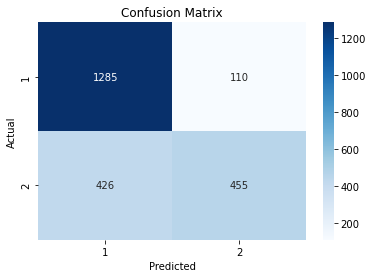

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Convert ratings to binary classes
df_encoded['rating_text'] = df_encoded['rating_text'].map({
    0: 1,  # 'Poor' -> class 1
    1: 1,  # 'Average' -> class 1
    2: 2,  # 'Good' -> class 2
    3: 2,  # 'Very Good' -> class 2
    4: 2   # 'Excellent' -> class 2
})

# Drop irrelevant columns
irrelevant_columns = ['address', 'link', 'phone', 'color', 'cuisine_color']
df_encoded_cleaned = df_encoded.drop(columns=irrelevant_columns)

# Define X and y for the binary classification
X = df_encoded_cleaned.drop(columns=['rating_number', 'rating_text']).values  # All columns except rating_number and rating_text
y = df_encoded_cleaned['rating_text'].values  # Target variable

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize logistic regression model
model_classification_3 = LogisticRegression()

# Fit the model on the training data
model_classification_3.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_classification_3.predict(X_test)

# Evaluate the model
cm_model3 = confusion_matrix(y_test, y_pred)
accuracy_model3 = accuracy_score(y_test, y_pred)

# Print confusion matrix and accuracy
print("Confusion Matrix:\n", cm_model3)
print("Accuracy:", accuracy_model3)

# Plt confusion matrix 
plt.figure(figsize=(6,4))
sns.heatmap(cm_model3, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2], yticklabels=[1, 2])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Gradient Descent Logistic Regression

We applied the Gradient Descent Logistic Regression used in Week 3 for the classification model. The confusion matrix shows that the model correctly classified 15 instances as negative and 881 instances as positive. However, it also made a significant number of errors, incorrectly classifying 1380 instances as positive. The model did not miss any positive instances, but it did misclassify a large number of negative instances as positive, indicating a need for improvement in its ability to distinguish between the two classes.

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


# Convert ratings to binary classes
df_encoded['rating_text'] = df_encoded['rating_text'].map({
    0: 1,  # 'Poor' -> class 1
    1: 1,  # 'Average' -> class 1
    2: 2,  # 'Good' -> class 2
    3: 2,  # 'Very Good' -> class 2
    4: 2   # 'Excellent' -> class 2
})

# Drop irrelevant columns
irrelevant_columns = ['address', 'link', 'phone', 'color', 'cuisine_color']
df_encoded_cleaned = df_encoded.drop(columns=irrelevant_columns)

# Define X and y for the binary classification
X = df_encoded_cleaned.drop(columns=['rating_number', 'rating_text']).values  # All columns except rating_number and rating_text
y = df_encoded_cleaned['rating_text'].values  # Target variable

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize parameters for logistic regression
init_parameters = {
    "weight": np.zeros(X_train.shape[1]),  # Initialize weights as a NumPy array
    "bias": 0  # Initialize bias
}

# Define the sigmoid function
def sigmoid(input):    
    output = 1 / (1 + np.exp(-input))
    return output

# Logistic regression optimization function
def optimize(x, y, learning_rate, iterations, parameters): 
    size = x.shape[0]
    weight = parameters["weight"] 
    bias = parameters["bias"]
    
    for i in range(iterations): 
        # Compute the linear combination
        sigma = sigmoid(np.dot(x, weight) + bias)
        # Calculate gradients
        dW = 1/size * np.dot(x.T, (sigma - y))
        db = 1/size * np.sum(sigma - y)
        
        # Update parameters
        weight -= learning_rate * dW
        bias -= learning_rate * db 
        
    parameters["weight"] = weight
    parameters["bias"] = bias
    return parameters

# Function to train logistic regression
def train_logistic_regression(x, y, learning_rate, iterations):
    parameters_out = optimize(x, y, learning_rate, iterations, init_parameters)
    return parameters_out

# Train the logistic regression model
learning_rate = 0.02
iterations = 5000
trained_parameters = train_logistic_regression(X_train, y_train, learning_rate, iterations)

# predict
y_pred = np.dot(X_test, trained_parameters["weight"]) + trained_parameters["bias"]
y_pred = sigmoid(y_pred)

# Convert predictions to binary classes (1 or 2) 
y_pred = [2 if p >= 0.5 else 1 for p in y_pred]  

# Evaluate the model using confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


C:\Users\pauar\AppData\Local\Temp\ipykernel_20608\700351840.py:39: RuntimeWarning: overflow encountered in exp
  output = 1 / (1 + np.exp(-input))


Confusion Matrix:
[[  15 1380]
 [   0  881]]


The confusion matrix shows that the model is very good at correctly identifying negative instances (1.00 accuracy), but it has a relatively high error rate for missing positive instances (0.01). This might indicate that the model is biased towards predicting negative instances.

<AxesSubplot:>

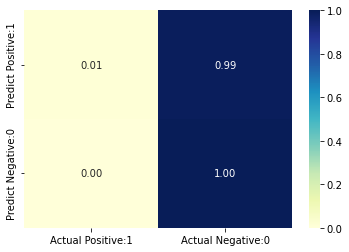

In [56]:
# visualize confusion matrix with seaborn heatmap
cm_normalised = cm.astype('float32') / cm.sum(axis=1)[:, np.newaxis]

cm_matrix = pd.DataFrame(data=cm_normalised, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='.2f', cmap='YlGnBu')


### Classification Task using Decision Tree, Random Forest, and Naive Bayes.

Logistic Regression had a moderate number of false positives (426), while Gradient Descent Logistic Regression showed a higher number of false positives (1380). In contrast, Decision Tree and Random Forest models demonstrated superior performance with significantly fewer false positives (95 and 87, respectively). Gaussian Naive Bayes also had a higher number of false positives (539).

In terms of false negatives, Logistic Regression had 110, while Gradient Descent Logistic Regression showed no false negatives (0). Both Decision Tree and Random Forest had moderate false negative counts (93 and 120, respectively), whereas Gaussian Naive Bayes had the fewest (23).

Overall, Decision Tree and Random Forest performed best in minimizing both false positives and false negatives, with Decision Tree slightly outperforming Random Forest in this regard.


Model: DecisionTreeClassifier
Accuracy: 0.9174
Confusion Matrix:
[[1300   95]
 [  93  788]]


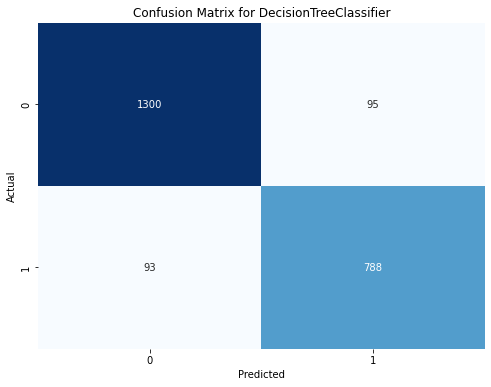


Model: RandomForestClassifier
Accuracy: 0.9091
Confusion Matrix:
[[1308   87]
 [ 120  761]]


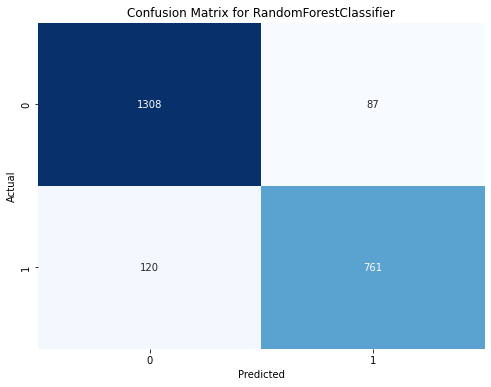


Model: GaussianNB
Accuracy: 0.7531
Confusion Matrix:
[[856 539]
 [ 23 858]]


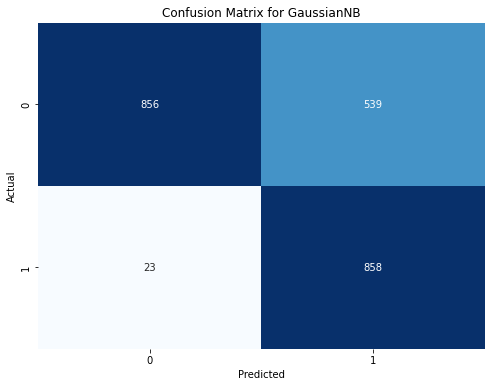

(0.7530755711775043,
 array([[856, 539],
        [ 23, 858]], dtype=int64))

In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Assuming df_encoded is your DataFrame
# Convert ratings to binary classes
df_encoded['rating_text'] = df_encoded['rating_text'].map({
    0: 1,  # 'Poor' -> class 1
    1: 1,  # 'Average' -> class 1
    2: 2,  # 'Good' -> class 2
    3: 2,  # 'Very Good' -> class 2
    4: 2   # 'Excellent' -> class 2
})

# Drop irrelevant columns
irrelevant_columns = ['address', 'link', 'phone', 'color', 'cuisine_color']
df_encoded_cleaned = df_encoded.drop(columns=irrelevant_columns)

# Define X and y for the binary classification
X = df_encoded_cleaned.drop(columns=['rating_number', 'rating_text']).values  # All columns except rating_number and rating_text
y = df_encoded_cleaned['rating_text'].values  # Target variable

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Define a function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"\nModel: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(cm)
    
    # Plot confusion matrix
    plot_confusion_matrix(cm, model.__class__.__name__)
    
    return accuracy, cm

# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=0)
evaluate_model(decision_tree, X_train, X_test, y_train, y_test)

# Random Forest Classifier
random_forest = RandomForestClassifier(random_state=0, n_estimators=100)
evaluate_model(random_forest, X_train, X_test, y_train, y_test)

# Naive Bayes (GaussianNB)
naive_bayes = GaussianNB()
evaluate_model(naive_bayes, X_train, X_test, y_train, y_test)


### Conclusion

This part of this assignment we compared the performance of two linear regression models and four classification models.

For the linear regression task, both Model 1 and Model 2 achieved strong predictive accuracy, with Model 1 demonstrating slightly better performance based on the Mean Squared Error and R-squared metrics.

For the classification task, Decision Tree and Random Forest classifiers emerged as the top-performing models. They exhibited minimal number of false positives compared to Logistic Regression, Gradient Descent Logistic Regression, and Gaussian Naive Bayes. While Gaussian Naive Bayes had the fewest false negatives, its overall accuracy was lower due to a higher number of false positives.